In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
data = pd.read_csv('Salary_dataset.csv')

In [19]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [20]:
data.shape

(30, 3)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [22]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [23]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [24]:
list(data.columns)

['Unnamed: 0', 'YearsExperience', 'Salary']

In [25]:
x = data.drop('Salary', axis=1)
y = data['Salary']

In [26]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

In [28]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((24, 2), (6, 2), (24,), (6,))

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest, ypred)
    print(f"{name} R2 Score: {r2:.4f}")

Linear Regression R2 Score: 0.8914
Decision Tree R2 Score: 0.8022
Random Forest R2 Score: 0.8962
SVM R2 Score: 0.8022
KNN R2 Score: 0.6099
Gradient Boosting R2 Score: 0.8022


In [41]:
best_model = models['Random Forest']
y_pred = best_model.predict(xtest)

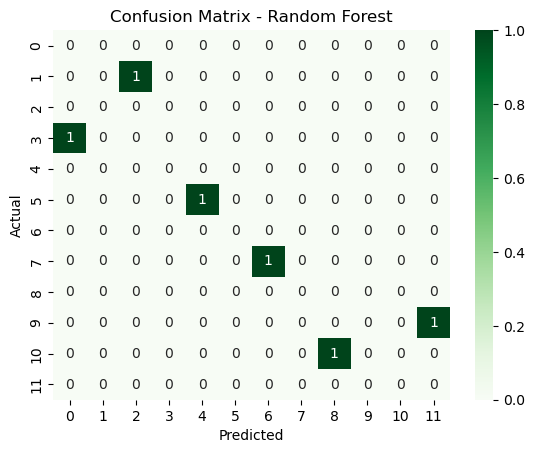

In [42]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()